In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize                                                        # Necessary Functions
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):                                                           # first derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):                                                           # Second derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):                                                           # Third derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-6*temp1+6*(temp1**2))
  return temp2



def sigmoid_for_k(input,k):                                                     # This function calculates different derivative when given k
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)




#  D2_Phi/D2_x + D2_Phi/D2_y = f(x,y)
def func(inputs):                                                               # This Function calculates f(x,y)
  X = inputs.T
  x = X[:,0]
  y = X[:,1]

  temp1 = x+(y**3) + 6*y -2
  temp2 = np.exp(-x)
  temp3 = temp1*temp2
  temp3 = temp3.reshape(len(x),1)
  # print(len(x))
  return temp3




def layer1NN(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)


  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases                                         # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # net_out = net_out.T
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out



def der_NN_xj_k(inputs, weights, nweights, biases,X, j,k=0):                    # This calculates D^k_N/D^k_x when j =0, and D^k_N/D^k_y when j=1
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j



  temp1 = weights[j]**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4.T                                                                # return (n,1) shape array


def der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j,k=0):              # This calculates D_Ng/D_v
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = ((weights[j]**k) * (sigmoid_for_k(lin_out,k).T) )
  return temp1                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j,k=0):              # This calculates D_Ng/D_u
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = weights[j]**k
  temp2 = nweights * temp1
  # temp2.reshape(weights[j].shape)
  temp3 = (sigmoid_for_k(lin_out,k+1).T * temp2)
  return temp3                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j,k=0,l=0):              # This calculates D_Ng/D_w
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  X = inputs.T
  x = X[:,0]
  # x = x.reshape(len(x),1)
  y = X[:,1]
  # y = y.reshape(len(y),1)

  lin_out = weights.T @ inputs + biases.T


  temp1 = ((nweights*(weights[j]**k)) * (sigmoid_for_k(lin_out,k+1).T) )
  if l ==0:
    temp2 = x
  else:
    temp2 = y

  temp3 = temp2 * (temp1.T)
  temp3 = temp3.T

  if k >0:
    temp4 = k*((nweights*(weights[j]**(k-1))) * (sigmoid_for_k(lin_out,k).T) )
    return temp3 + temp4

  return temp3                                                                   # return (n, n_neurons) shape array


#  Phi = A(x,y) + F(x,y,N)

def D2_A_wrt_x1(inputs):                                                        # This calculates D^2 A/Dx^2
  X = inputs.T
  x = X[:,0]
  y = X[:,1]
  temp1 = (1- y)*(x-2) * np.exp(-x)
  temp2 = (y)*(x-1) * np.exp(-x)
  temp3 = temp1 + temp2
  temp3 = temp3.reshape(len(x),1)
  return temp3

def D2_A_wrt_x2(inputs):                                                        # This calculates D^2 A/Dy^2
  X = inputs.T
  x = X[:,0]
  y = X[:,1]
  temp1 = 6*(1- x)*y
  temp2 = (6*np.exp(-1))*(x)*y
  temp3 = temp1 + temp2
  temp3 = temp3.reshape(len(x),1)
  return temp3

def D2_F_wrt_x1(inputs, weights, nweights, biases):                           # This calculates D^2 F/Dx^2
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)



  # Phi = A(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=0)
  N_1 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=1)
  N_2 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=2)
  temp1 = -2* N_0
  temp2 = (2-4*x)*N_1
  temp3 = (x- x**2)*N_2
  temp4 = (y-y**2)*(temp1 + temp2 + temp3)                                       # return (n,n_neurons) shape array

  # print(temp1.shape,temp2.shape,temp3.shape,temp4.shape)
  return temp4

def D2_F_wrt_x2(inputs, weights, nweights, biases):                           # This calculates D^2 F/Dy^2

  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  # Phi = A(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=0)
  N_1 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=1)
  N_2 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=2)
  temp1 = -2* N_0
  temp2 = (2-4*y)*N_1
  temp3 = (y- y**2)*N_2
  temp4 = (x-x**2)*(temp1 + temp2+ temp3)
  return temp4                                                                  # return (n,n_neurons) shape array




# Error = (D^2_Phi/D^2_x + D^2_Phi/D^2_y - f(x,y))
# Squared Error = np.sum(Error**2)
# D(Squared Error)/DV = 2* ( Error.T @ D(Error)/DV)
# D(Squared Error)/DU = 2* ( Error.T @ D(Error)/DU)
# D(Squared Error)/DW = 2* ( Error.T @ D(Error)/DW)


def error(d2_F_wrt_x1 ,d2_F_wrt_x2 ,d2_A_wrt_x1 ,d2_A_wrt_x2 ,F_XY):            # This calculates Error
  temp1 = (d2_F_wrt_x1 + d2_F_wrt_x2 + d2_A_wrt_x1 + d2_A_wrt_x2)
  temp2 = F_XY
  # print(temp1.shape)
  return (temp1 -temp2)

def error_for_trans_wrt_v(inputs, N_0_v, N_1_v_x, N_1_v_y, N_2_v_x, N_2_v_y):    # This calculates D(Error)/DV
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = -2* N_0_v
  temp2 = (2-4*x)*N_1_v_x
  temp3 = (x- x**2)*N_2_v_x
  temp4 = (y-y**2)*(temp1 + temp2+ temp3)


  temp5 = -2* N_0_v
  temp6 = (2-4*y)*N_1_v_y
  temp7 = (y- y**2)*N_2_v_y
  temp8 = (x-x**2)*(temp5 + temp6+ temp7)

  return temp4 + temp8                                                           # return (n,n_neurons) shape array

def error_for_trans_wrt_u(inputs, N_0_u, N_1_u_x, N_1_u_y, N_2_u_x, N_2_u_y):    # This calculates D(Error)/DU
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = -2* N_0_u
  temp2 = (2-4*x)*N_1_u_x
  temp3 = (x- x**2)*N_2_u_x
  temp4 = (y-y**2)*(temp1 + temp2 + temp3)


  temp5 = -2* N_0_u
  temp6 = (2-4*y)*N_1_u_y
  temp7 = (y- y**2)*N_2_u_y
  temp8 = (x-x**2)*(temp5 + temp6 + temp7)

  return temp4 + temp8


def error_for_trans_wrt_w0(inputs, N_0_w0, N_1_w0_x, N_1_w0_y, N_2_w0_x, N_2_w0_y):   # This calculates D(Error)/DW[0]
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = -2* N_0_w0
  temp2 = (2-4*x)*N_1_w0_x
  temp3 = (x- x**2)*N_2_w0_x
  temp4 = (y-y**2)*(temp1 + temp2 + temp3)


  temp5 = -2* N_0_w0
  temp6 = (2-4*y)*N_1_w0_y
  temp7 = (y-y**2)*N_2_w0_y
  temp8 = (x-x**2)*(temp5 + temp6 + temp7)

  return temp4 + temp8

def error_for_trans_wrt_w1(inputs, N_0_w1, N_1_w1_x, N_1_w1_y, N_2_w1_x, N_2_w1_y):    # This calculates D(Error)/DW[1]
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = -2* N_0_w1
  temp2 = (2-4*x)*N_1_w1_x
  temp3 = (x- x**2)*N_2_w1_x
  temp4 = (y-y**2)*(temp1 + temp2 + temp3)


  temp5 = -2* N_0_w1
  temp6 = (2-4*y)*N_1_w1_y
  temp7 = (y- y**2)*N_2_w1_y
  temp8 = (x-x**2)*(temp5 + temp6 + temp7)

  return temp4 + temp8



In [2]:
def error4(p,inputs):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)           # This calculates Error
  F_XY        = func(inputs)
  d2_F_wrt_x1 = D2_F_wrt_x1(inputs, weights, nweights, biases)
  d2_F_wrt_x2 = D2_F_wrt_x2(inputs, weights, nweights, biases)
  d2_A_wrt_x1 = D2_A_wrt_x1(inputs)
  d2_A_wrt_x2 = D2_A_wrt_x2(inputs)


  temp1 = (d2_F_wrt_x1 + d2_F_wrt_x2 + d2_A_wrt_x1 + d2_A_wrt_x2)
  temp2 = F_XY
  # print(temp1.shape,d2_F_wrt_x1.shape,d2_A_wrt_x1.shape)
  return (temp1 -temp2).T@ (temp1 -temp2)

In [3]:
def calc_grad(p,inputs):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)
  # This Estimates the Following
  # D(Squared Error)/DV = 2* ( Error.T @ D(Error)/DV)
  # D(Squared Error)/DU = 2* ( Error.T @ D(Error)/DU)
  # D(Squared Error)/DW = 2* ( Error.T @ D(Error)/DW)


  F_XY        = func(inputs)
  d2_F_wrt_x1 = D2_F_wrt_x1(inputs, weights, nweights, biases)
  d2_F_wrt_x2 = D2_F_wrt_x2(inputs, weights, nweights, biases)
  d2_A_wrt_x1 = D2_A_wrt_x1(inputs)
  d2_A_wrt_x2 = D2_A_wrt_x2(inputs)
  err = error(d2_F_wrt_x1 ,d2_F_wrt_x2 ,d2_A_wrt_x1 ,d2_A_wrt_x2 ,F_XY)

  N_0_v = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=0,k=0)         # j =0 doesnt matter here
  N_1_v_x = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=0,k=1)
  N_1_v_y = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=1,k=1)
  N_2_v_x = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=0,k=2)
  N_2_v_y = der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j=1,k=2)


  N_0_u = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=0,k=0)         # j =0 doesnt matter here
  N_1_u_x = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=0,k=1)
  N_1_u_y = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=1,k=1)
  N_2_u_x = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=0,k=2)
  N_2_u_y = der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j=1,k=2)


  N_0_w0 = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=0,l=0)         # j =0 doesnt matter here
  N_1_w0_x = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1,l=0)
  N_1_w0_y = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=1,k=1,l=0)
  N_2_w0_x = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2,l=0)
  N_2_w0_y = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=1,k=2,l=0)


  N_0_w1 = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=0, l=1)         # j =0 doesnt matter here
  N_1_w1_x = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=1, l=1)
  N_1_w1_y = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=1,k=1, l=1)
  N_2_w1_x = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=0,k=2, l=1)
  N_2_w1_y = der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j=1,k=2, l=1)

  err_for_trans_wrt_v = error_for_trans_wrt_v(inputs, N_0_v, N_1_v_x, N_1_v_y, N_2_v_x, N_2_v_y)
  err_for_trans_wrt_u = error_for_trans_wrt_u(inputs, N_0_u, N_1_u_x, N_1_u_y, N_2_u_x, N_2_u_y)
  err_for_trans_wrt_w0 = error_for_trans_wrt_w0(inputs, N_0_w0, N_1_w0_x, N_1_w0_y, N_2_w0_x, N_2_w0_y)
  err_for_trans_wrt_w1 = error_for_trans_wrt_w1(inputs, N_0_w1, N_1_w1_x, N_1_w1_y, N_2_w1_x, N_2_w1_y)


  grad_v = err.T @ err_for_trans_wrt_v
  grad_u = err.T @ err_for_trans_wrt_u
  grad_w0 = err.T @ err_for_trans_wrt_w0
  grad_w1 = err.T @ err_for_trans_wrt_w1


  dp = np.array([grad_w0, grad_w1, grad_u,grad_v ])
  dp = dp.reshape(1,len(p))
  return dp[0]

In [4]:
def trail_sol(inputs, A_XY, N):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  # print(len(x))
  temp1 = A_XY
  temp2 = (x-x**2)*(y-y**2)*(N.T)
  return temp1 + temp2


def A_XY(inputs):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = (1-x)*(y**3)
  temp2 = (np.exp(-1))*x*(1+y**3)
  temp3 = (x-y*x)*(np.exp(-x)-np.exp(-1))
  temp4 = (y+y*x)*np.exp(-x)
  temp5 = y* (1 - x + 2*(np.exp(-1))*x)

  return temp1 + temp2 + temp3 + temp4 - temp5


def analytic_sol(inputs):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = np.exp(-x)
  temp2 = x+ y**3

  return temp1 * temp2




In [24]:
def get_grid(grid_len,a=0,b=1):                                                 # Creating a grid of training point and converting it into shape (2,100)
  nx, ny = (grid_len, grid_len)
  x = np.linspace(a, b, nx)
  y = np.linspace(a, b, ny)
  grid = [(i,j) for i in x for j in y]
  return [np.array(grid).T,[x,y]]





n_train = 10
inputs,X = get_grid(n_train)
n_inputs = 2
n_neurons =10

p4 = np.random.randn(1,4*n_neurons)
p4 = p4[0]




In [22]:

err = error4(p4,inputs)
err


array([[172.54218568]])

In [23]:
res4 = minimize(error4,p4, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})

KeyboardInterrupt: 

In [8]:
err = error4(res4.x,inputs)
err

array([[0.00062553]])

In [9]:
#Test Data

n_test = 100
inputs,X = get_grid(n_test)

_, netout = layer1NN(res4.x, inputs)
a_xy = A_XY(inputs)
y_predict = trail_sol(inputs, a_xy, netout)
y_true = analytic_sol(inputs)
X = inputs.T
x = X[:,0]
x = x.reshape(len(x),1)
y = X[:,1]
y = y.reshape(len(y),1)

# y_predict = y_predict.reshape(10,10)
# y_predict

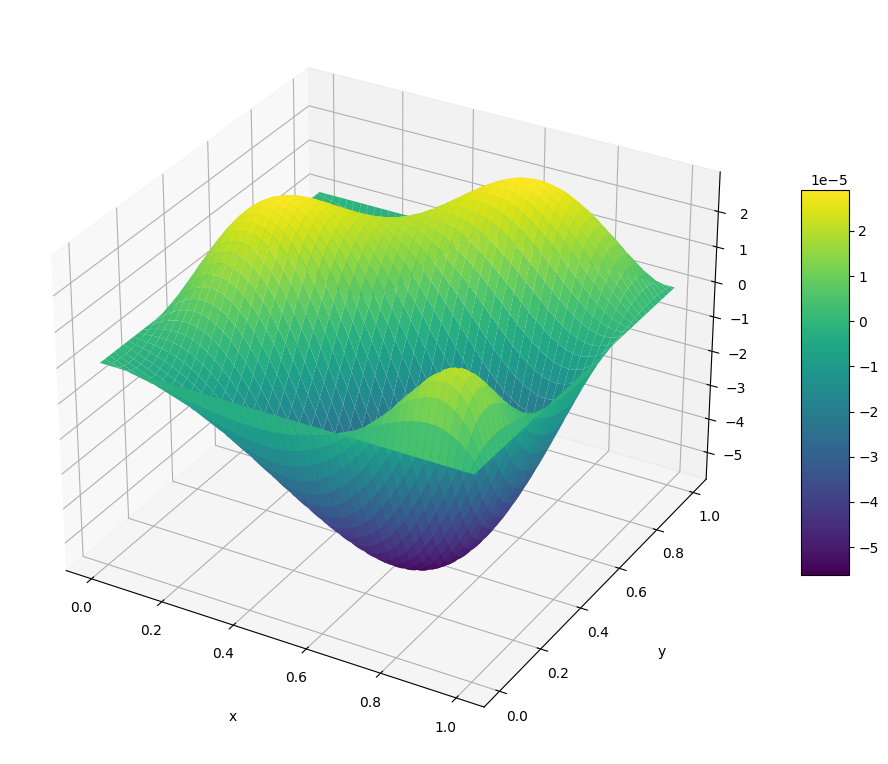

In [10]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, n_test)
y = np.linspace(0, 1, n_test)

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, (y_true-y_predict).reshape(n_test,n_test), cmap = 'viridis')


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

surf1 = ax.plot_surface(X, Y, (y_true).reshape(n_test,n_test), cmap = 'viridis')

fig.colorbar(surf1, shrink=0.5, aspect=8)

plt.show()




In [12]:
import time

In [11]:
n_train = 10
inputs,X = get_grid(n_train)


In [25]:
start_time = time.time()
options = {'disp': True, 'gtol': 1e-14, 'eps': 1e-14}
res4 = minimize(error4, p4, method='BFGS', jac=calc_grad, args=(inputs), options=options)
end_time = time.time()


         Current function value: 0.000104
         Iterations: 40
         Function evaluations: 96
         Gradient evaluations: 85


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [26]:
print(end_time - start_time)

0.39134860038757324


In [27]:
err = error4(res4.x,inputs)
err

array([[0.00010362]])

In [28]:
#Test Data

n_test = 100
inputs,X = get_grid(n_test)

_, netout = layer1NN(res4.x, inputs)
a_xy = A_XY(inputs)
y_predict = trail_sol(inputs, a_xy, netout)
y_true = analytic_sol(inputs)
X = inputs.T
x = X[:,0]
x = x.reshape(len(x),1)
y = X[:,1]
y = y.reshape(len(y),1)

# y_predict = y_predict.reshape(10,10)
# y_predict

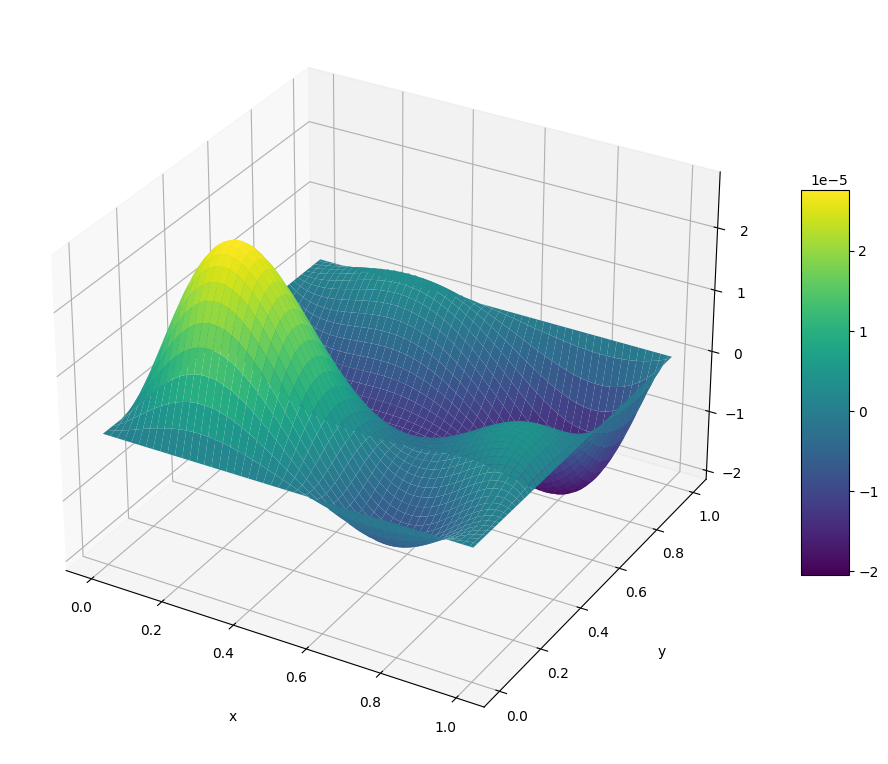

In [29]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, n_test)
y = np.linspace(0, 1, n_test)

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, (y_true-y_predict).reshape(n_test,n_test), cmap = 'viridis')


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()





In [ ]:
def error_min_train_hidd(neurons, train_points):
  # Training Points                                                               # Intial Values
  inputs,X = get_grid(train_points)
  n_neurons = neurons
  p = np.random.randn(1,4*n_neurons)
  p =p[0]
  options = {'disp': False, 'gtol': 1e-14, 'eps': 1e-14}
  res = minimize(error4, p, method='BFGS', jac=calc_grad, args=(inputs), options=options)
  return res.x


In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login(key='da5365b4335ad8c7a1df7f3653ec9d0b092e8b09')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# You need to define a config file in the form of dictionary or yaml
sweep_config = {
    'method': 'grid',
    'name': 'sweep Hidden Units Training Datasets',
    'metric': {
        'name': 'Error',
        'goal': 'minimize'
    },
    'parameters': {
        'hiddenUnits': {
            'values': [i for i in range(10, 105, 10)]
        },
        'trainingPoints': {
            'values': [i for i in range(10, 110, 10)]
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='ANN_Proj_Ques_5_new_2')

Create sweep with ID: ybkfc3au
Sweep URL: https://wandb.ai/shubham821/ANN_Proj_Ques_5_new_2/sweeps/ybkfc3au


In [ ]:


def Error(config):
    hiddenUnits = config['hiddenUnits']
    trainingPoints = config['trainingPoints']
    n_test = 100
    inputs_test,X = get_grid(n_test)
    a_xy = A_XY(inputs_test)

    ysum=0
    run = 10
    for i in range(run):
      weights = error_min_train_hidd(hiddenUnits, trainingPoints)


      _, N1 = layer1NN(weights ,inputs_test)
      y_i = trail_sol(inputs_test, a_xy, N1)
      ysum += y_i
    yt = ysum/run
    ya = analytic_sol(inputs_test)
    err = np.linalg.norm(yt-ya)

    wandb.log({"Error": err})

In [ ]:
def main():
    '''
    WandB calls main function each time with different combination.

    We can retrieve the same and use the same values for our hyperparameters.
    '''
    with wandb.init() as run:
        run_name = "-Hidd_units" + str(wandb.config.hiddenUnits) + "-Train_points_" + str(wandb.config.trainingPoints)
        wandb.run.name = run_name
        #obj=NN(wandb.config['num_layers'],wandb.config['hidden_size'])

        Error(wandb.config)

wandb.agent(sweep_id, function=main)  # calls main function for count number of times.
wandb.finish()

In [ ]:
wandb.finish()

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7d7079607b80>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7d7079607b80>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


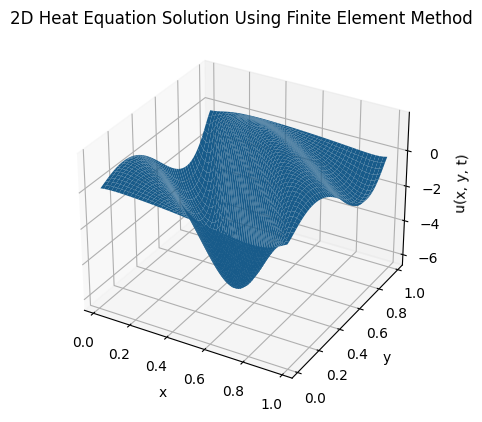

In [ ]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Define the problem parameters
Lx = 1.0  # Length in x-direction
Ly = 1.0  # Length in y-direction
T = 1.0  # Final time
k = 1.0  # Thermal conductivity
alpha = k / (1.0 * 1.0)  # Thermal diffusivity (assuming density and specific heat capacity are 1)
nx = 50  # Number of subdivisions in x-direction
ny = 50  # Number of subdivisions in y-direction
nt = 100  # Number of time subdivisions

# Set up the spatial grids
x = np.linspace(0, Lx, nx + 1)
y = np.linspace(0, Ly, ny + 1)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Set up the time grid
t = np.linspace(0, T, nt + 1)
dt = t[1] - t[0]

# Set up the initial and boundary conditions
u0 = np.zeros((nx + 1, ny + 1))
u0[0, :] = 0.0  # Left boundary condition
u0[1, :] = (y**2)*(np.sin(np.pi))  # Right boundary condition
u0[:, 0] = 0.0  # Bottom boundary condition
u0[:, 1] = np.sin(np.pi*x)  # Top boundary condition


# Define the FEM matrices
main_diag_x = (2 + alpha * dt / dx**2) * np.ones(nx + 1)
off_diag_x = -alpha * dt / (2 * dx**2) * np.ones(nx)
Ax = diags([off_diag_x, main_diag_x, off_diag_x], [-1, 0, 1]).toarray()

main_diag_y = (2 + alpha * dt / dy**2) * np.ones(ny + 1)
off_diag_y = -alpha * dt / (2 * dy**2) * np.ones(ny)
Ay = diags([off_diag_y, main_diag_y, off_diag_y], [-1, 0, 1]).toarray()

A = np.kron(Ay, np.eye(nx + 1)) + np.kron(np.eye(ny + 1), Ax)


# Define the source term F(x, y)
def F(x, y):
    return np.sin(np.pi * x) * (2- (np.pi**2)*(y**2))

# Solve the heat equation using FEM
u = np.zeros((nt + 1, nx + 1, ny + 1))
u[0, :, :] = u0

for i in range(nt):
    rhs = u[i, :, :].flatten()
    rhs_source = np.zeros_like(rhs)

    for j in range(1, nx + 1):
        for k in range(1, ny + 1):
            rhs_source[j * ny + k - ny - 1] = F(x[j - 1], y[k - 1]) * dx * dy

    rhs[1::ny] = 0.0  # Left and right boundary conditions
    rhs[::nx] = 0.0  # Bottom boundary condition
    rhs[nx - 1::nx] = 0.0  # Top boundary condition

    u[i + 1, :, :] = np.reshape(spsolve(A, rhs + alpha * dt * rhs_source), (nx + 1, ny + 1))


# Plot the solution
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x[1:-1], y[1:-1])
ax.plot_surface(X, Y, u[-1, 1:-1, 1:-1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.title("2D Heat Equation Solution Using Finite Element Method")
plt.show()

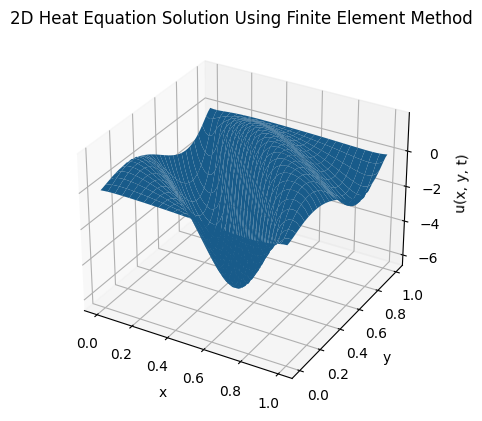

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[-1, :, :])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.title("2D Heat Equation Solution Using Finite Element Method")
plt.show()

In [ ]:
method: bayes
metric:
  goal: minimize
  name: Relative Time (Process)
parameters:
  hiddenUnits:
    distribution: int_uniform
    max: 100
    min: 60
  trainingPoints:
    distribution: int_uniform
    max: 100
    min: 10
program: train.py


SyntaxError: invalid syntax (<ipython-input-6-966957492d51>, line 2)

In [ ]:
import wandb

wandb.init(config={"hiddenUnits": 50, "trainingPoints": 10})  # Example config

wandb: Currently logged in as: sh2001 (shubham821). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.log(wandb.log({"Error": err}))

NameError: name 'err' is not defined

In [ ]:
wandb sweep --update shubham821/ANN_Proj_Ques_5_new_2/tzd86lkm sweep.yaml

SyntaxError: invalid syntax (<ipython-input-11-dad0741146ac>, line 1)

In [ ]:
!wandb agent shubham821/ANN_Proj_Ques_5_new_2/tzd86lkm

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7d7079607b80>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

wandb: ERROR Find detailed error logs at: /content/wandb/debug-cli.root.log
Error: Connection to wandb service failed: [Errno 111] Connection refused. 
Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7d7079607b80>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


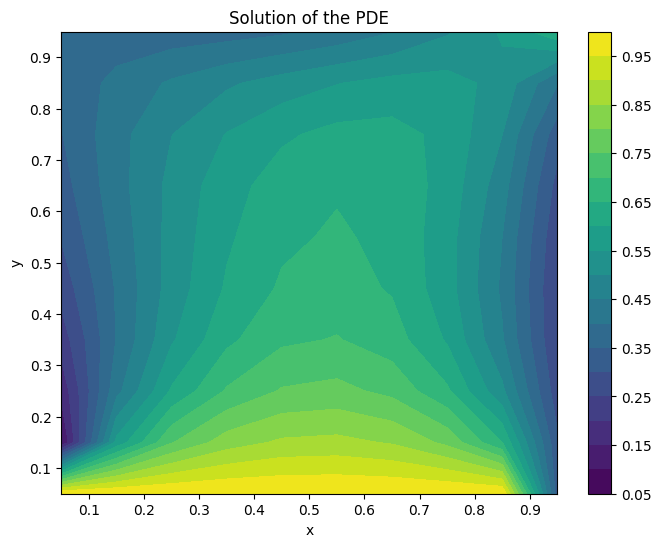

In [33]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Define the PDE and boundary conditions
def pde(x, y):
    return np.exp(x) * (x - 2 + y**3 + 6*y)

def dirichlet_bc(x, y):
    return y**3, (1 + y**3) * np.exp(-1), x * np.exp(-x), np.exp(-x) * (x + 1)

# Discretize the domain into elements
nx, ny = 10, 10  # Number of elements in x and y directions
x = np.linspace(0, 1, nx + 1)
y = np.linspace(0, 1, ny + 1)
X, Y = np.meshgrid(x[:-1] + 0.5 * (x[1] - x[0]), y[:-1] + 0.5 * (y[1] - y[0]))

# Construct the stiffness matrix and load vector
K = np.zeros((nx * ny, nx * ny))
F = np.zeros(nx * ny)

for i in range(nx):
    for j in range(ny):
        idx = i * ny + j
        x_mid, y_mid = X[i, j], Y[i, j]
        F[idx] = pde(x_mid, y_mid) * (x[i + 1] - x[i]) * (y[j + 1] - y[j])

        if i > 0:
            K[idx, (i - 1) * ny + j] = -1
        if i < nx - 1:
            K[idx, (i + 1) * ny + j] = -1
        if j > 0:
            K[idx, i * ny + j - 1] = -1
        if j < ny - 1:
            K[idx, i * ny + j + 1] = -1
        K[idx, idx] = 4

# Apply boundary conditions

for i in range(nx):
    idx = i * ny
    F[idx] = dirichlet_bc(x[i], y[0])[0]
    K[idx, :] = 0
    K[idx, idx] = 1

for j in range(ny):
    idx = (nx - 1) * ny + j
    F[idx] = dirichlet_bc(x[-1], y[j])[1]
    K[idx, :] = 0
    K[idx, idx] = 1

for i in range(nx):
    idx = i * ny
    F[idx] = dirichlet_bc(x[i], y[0])[2]
    K[idx, :] = 0
    K[idx, idx] = 1

for j in range(1, ny):
    idx = j - 1
    F[idx] = dirichlet_bc(x[0], y[j])[3]
    K[idx, :] = 0
    K[idx, idx] = 1


# Solve the linear system of equations
U = spsolve(K, F)
U = U.reshape(nx, ny)

# Post-process the solution (e.g., visualize)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, U, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the PDE')
plt.show()

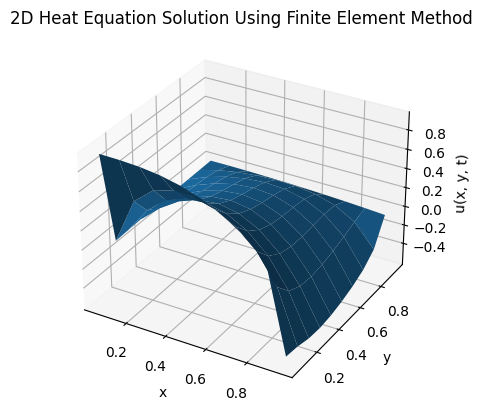

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x[:-1] + 0.5 * (x[1] - x[0]), y[:-1] + 0.5 * (y[1] - y[0]))
ax.plot_surface(X, Y, U - f(x[:-1] + 0.5 * (x[1] - x[0]), y[:-1] + 0.5 * (y[1] - y[0]) ))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.title("2D Heat Equation Solution Using Finite Element Method")
plt.show()

In [41]:
def f(x,y):
  U_true = np.zeros((len(x),len(y)))
  for i in range(len(x)):
    for j in range(len(x)):
      U_true[i,j] = np.exp(-x[i])*(x[i] + y[j]**3)

  return U_true


In [29]:
f(x,y)

array([[0.00000000e+00, 1.00000000e-06, 8.00000000e-06, ...,
        9.41192000e-01, 9.70299000e-01, 1.00000000e+00],
       [9.90049834e-03, 9.90148839e-03, 9.90841874e-03, ...,
        9.41727481e-01, 9.70544862e-01, 9.99950332e-01],
       [1.96039735e-02, 1.96049537e-02, 1.96118151e-02, ...,
        9.42159123e-01, 9.70689766e-01, 9.99802647e-01],
       ...,
       [3.67804877e-01, 3.67805252e-01, 3.67807879e-01, ...,
        7.21044681e-01, 7.31968861e-01, 7.43115976e-01],
       [3.67860924e-01, 3.67861296e-01, 3.67863897e-01, ...,
        7.17585933e-01, 7.28401416e-01, 7.39437615e-01],
       [3.67879441e-01, 3.67879809e-01, 3.67882384e-01, ...,
        7.14124628e-01, 7.24832495e-01, 7.35758882e-01]])

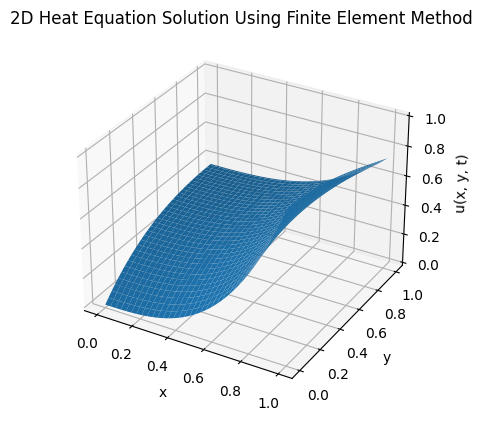

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, f(x,y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.title("2D Heat Equation Solution Using Finite Element Method")
plt.show()

In [20]:
U_true = np.zeros((len(x),len(y)))

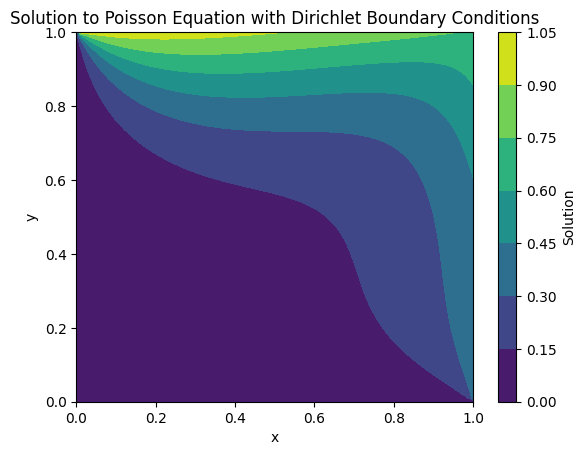

In [64]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Define the parameters and grid
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
hx = x[1] - x[0]
hy = y[1] - y[0]

# Define the source term function
def f(x, y):
    return np.exp(x) * (x - 2 + y**3 + 6*y)

# Define the Dirichlet boundary conditions
def dirichlet_bc(x, y):
    if y == 0:
        return y**3
    elif x == 1:
        return (1 + y**3) * np.exp(-1)
    elif x == 0:
        return x * np.exp(-x)
    elif y == 1:
        return np.exp(-x) * (x + 1)

# Construct the finite difference operator for the Poisson equation
N = n**2
A = np.zeros((N, N))
rhs = np.zeros(N)
for i in range(1, n - 1):
    for j in range(1, n - 1):
        k = i + j * n
        A[k, k] = -2 / hx**2 - 2 / hy**2
        A[k, k - 1] = 1 / hx**2
        A[k, k + 1] = 1 / hx**2
        A[k, k - n] = 1 / hy**2
        A[k, k + n] = 1 / hy**2
        rhs[k] = f(x[i], y[j])

# Apply the Dirichlet boundary conditions
for i in range(n):
    k1 = i
    k2 = i + (n - 1) * n
    A[k1, :] = 0
    A[k1, k1] = 1
    A[k2, :] = 0
    A[k2, k2] = 1
    rhs[k1] = dirichlet_bc(x[i], y[0])
    rhs[k2] = dirichlet_bc(x[i], y[-1])

for j in range(1, n - 1):
    k1 = j * n
    k2 = (j + 1) * n - 1
    A[k1, :] = 0
    A[k1, k1] = 1
    A[k2, :] = 0
    A[k2, k2] = 1
    rhs[k1] = dirichlet_bc(x[0], y[j])
    rhs[k2] = dirichlet_bc(x[-1], y[j])

# Solve the linear system
u = spsolve(csr_matrix(A), rhs)

# Reshape the solution
U = u.reshape((n, n))

# Plot the solution
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, U, cmap='viridis')
plt.colorbar(label='Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to Poisson Equation with Dirichlet Boundary Conditions')
plt.show()


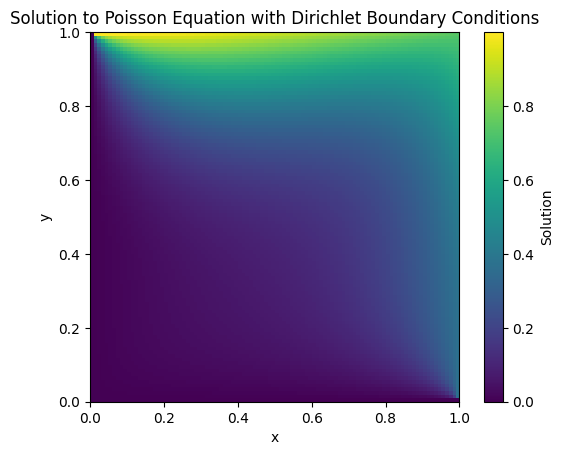

In [65]:
plt.imshow(U, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to Poisson Equation with Dirichlet Boundary Conditions')
plt.show()


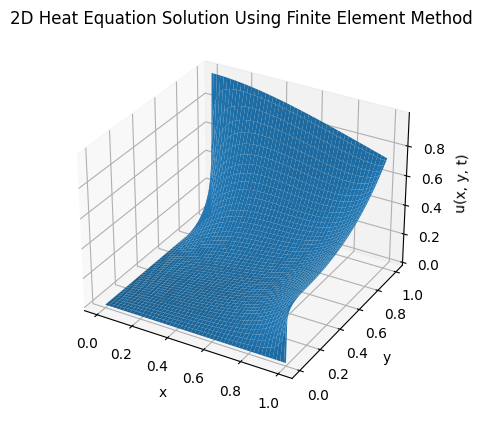

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, U)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.title("2D Heat Equation Solution Using Finite Element Method")
plt.show()

In [67]:
from scipy.linalg import solve

# Solve the linear system using a direct solver
u = solve(A.tocsr(), rhs)

# Reshape the solution
U = u.reshape((n, n))

# Plot the solution
plt.contourf(X, Y, U)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to Poisson Equation with Dirichlet Boundary Conditions')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'tocsr'